In [40]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn
seaborn.set()

In [2]:
df = pd.read_json('osm/amenities-vancouver.json.gz', lines=True)

In [3]:
df

,lat,lon,timestamp,amenity,name,tags
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ..."
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...
2,49.373423,-123.291894,2016-10-10T02:14:29.000-07:00,toilets,NaN,{}
3,49.249848,-122.959708,2011-09-06T03:52:10.000-07:00,bbq,NaN,{}
4,49.370898,-123.280448,2015-05-03T00:42:25.000-07:00,place_of_worship,St. Monica's Anglican Church,"{'addr:housenumber': '6404', 'addr:street': 'W..."
...,...,...,...,...,...,...
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{}
17714,49.278770,-122.797628,2013-03-26T23:45:49.000-07:00,restaurant,Togo Sushi,{'cuisine': 'japanese'}
17715,49.276443,-122.790138,2013-03-26T23:45:50.000-07:00,parking,NaN,{}
17716,49.282666,-122.826978,2019-09-13T13:56:49.000-07:00,pub,Brown's Social House,"{'addr:housenumber': '215', 'brewery': 'Guinne..."


In [4]:
food_count = df[(df['amenity'] == 'fast_food') | (df['amenity'] == 'restaurant')].groupby('name').count()

In [5]:
food_count['is_chain'] = (food_count['lat'] > 1)

In [6]:
chain_count = food_count[food_count['is_chain'] == True]
non_chain_count = food_count[food_count['is_chain'] == False]

In [7]:
chain_count = chain_count.reset_index()
non_chain_count = non_chain_count.reset_index()

In [8]:
chain_count

,name,lat,lon,timestamp,amenity,tags,is_chain
0,A&W,55,55,55,55,55,True
1,Al Basha,2,2,2,2,2,True
2,Arby's,2,2,2,2,2,True
3,Asa Sushi,2,2,2,2,2,True
4,Banana Leaf,4,4,4,4,4,True
...,...,...,...,...,...,...,...
262,X-Site Grill & Bistro,2,2,2,2,2,True
263,Yolks,2,2,2,2,2,True
264,Zaika Tastes of India,2,2,2,2,2,True
265,Zeitoon,2,2,2,2,2,True


In [9]:
non_chain_count

,name,lat,lon,timestamp,amenity,tags,is_chain
0,0755 Restaurant & Lounge,1,1,1,1,1,False
1,17°C Dessert Café,1,1,1,1,1,False
2,1827,1,1,1,1,1,False
3,2001 Flavors,1,1,1,1,1,False
4,24 Train Express Noodle House,1,1,1,1,1,False
...,...,...,...,...,...,...,...
2261,rasoee,1,1,1,1,1,False
2262,strEATS Aldergrove,1,1,1,1,1,False
2263,trattoria Burnaby,1,1,1,1,1,False
2264,yoko sushi,1,1,1,1,1,False


In [10]:
# chain_count['name'] = chain_count['name'].astype('str') 

In [11]:
# df.join(chain_count, on='name')

In [12]:
# is_chain = chain_count[]''

In [13]:
is_chain = chain_count[['name','is_chain']]
non_chain = non_chain_count[['name','is_chain']]
is_chain

,name,is_chain
0,A&W,True
1,Al Basha,True
2,Arby's,True
3,Asa Sushi,True
4,Banana Leaf,True
...,...,...
262,X-Site Grill & Bistro,True
263,Yolks,True
264,Zaika Tastes of India,True
265,Zeitoon,True


In [14]:
if_chain = pd.concat([is_chain,non_chain])
if_chain

,name,is_chain
0,A&W,True
1,Al Basha,True
2,Arby's,True
3,Asa Sushi,True
4,Banana Leaf,True
...,...,...
2261,rasoee,False
2262,strEATS Aldergrove,False
2263,trattoria Burnaby,False
2264,yoko sushi,False


In [15]:
# chain_count['name'].values

In [16]:
df = df.merge(if_chain, how='outer', on='name')

In [17]:
df

,lat,lon,timestamp,amenity,name,tags,is_chain
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",NaN
1,49.212659,-122.919347,2019-07-02T01:10:30.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",NaN
2,49.278119,-122.912285,2020-01-18T09:04:52.000-08:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",NaN
3,49.276908,-122.858963,2020-02-12T23:53:44.000-08:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",NaN
4,49.040895,-122.269834,2016-08-16T16:50:10.000-07:00,cafe,Starbucks,{'cuisine': 'coffee_shop'},NaN
...,...,...,...,...,...,...,...
17713,49.262659,-123.251745,2019-11-04T20:07:41.000-08:00,cafe,Magma Cafè,"{'wheelchair': 'yes', 'addr:housenumber': '633...",NaN
17714,49.145150,-122.014576,2019-02-24T18:40:19.000-08:00,recycling,Pick-A-Part,"{'recycling_type': 'centre', 'shop': 'car_part...",NaN
17715,49.250408,-123.076261,2017-07-08T05:22:57.000-07:00,restaurant,House of Dosas,"{'addr:housenumber': '1391', 'phone': '+1-604-...",False
17716,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{},NaN


In [18]:
# df['is_chain'] = (df['is_chain'] == True)

In [19]:
food = df[df.is_chain.notnull()]
food

,lat,lon,timestamp,amenity,name,tags,is_chain
217,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,True
218,49.279114,-123.115825,2019-09-03T04:57:07.000-07:00,fast_food,Salad Loop,{},True
9800,49.126650,-123.182470,2020-03-30T09:08:51.000-07:00,restaurant,Best Bite Indian Cuisine,"{'addr:housenumber': '10-3891', 'phone': '+1-6...",False
9836,49.265951,-123.246630,2011-11-19T08:06:36.000-08:00,pub,Mahony and Sons,{'wheelchair': 'yes'},False
9837,49.289384,-123.114425,2019-11-11T23:55:54.000-08:00,restaurant,Mahony and Sons,"{'addr:housenumber': '1055', 'website': 'http:...",False
...,...,...,...,...,...,...,...
17700,49.266708,-123.004592,2020-02-20T03:28:26.000-08:00,fast_food,Edible Arrangements,"{'addr:housenumber': '4459', 'addr:street': 'L...",False
17701,49.266800,-123.003969,2020-03-03T02:18:15.000-08:00,restaurant,Grand Chinese Restaurant,"{'addr:province': 'BC', 'cuisine': 'chinese', ...",False
17702,49.266805,-123.004252,2020-03-03T02:18:15.000-08:00,fast_food,Buffalo's Wings,"{'addr:province': 'BC', 'addr:street': 'Loughe...",False
17705,49.050222,-122.326013,2019-09-02T22:08:25.000-07:00,restaurant,Sushi Nine,"{'addr:housenumber': '32500', 'alt_name': 'Sus...",False


In [20]:
# df[df['is_chain'] == True]

In [21]:
mid_lat = np.mean([min(food['lat']), max(food['lat'])])
mid_lon = np.mean([min(food['lon']), max(food['lon'])])
print(mid_lat, mid_lon)

49.19456545 -122.76713455000001


In [22]:
def district(df):
    if df['lat'] > mid_lat:
        if df['lon'] > mid_lon:
            return 1
        else:
            return 2
    else:
        if df['lon'] > mid_lon:
            return 3
        else:
            return 4

In [23]:
# df['north'] = (df['lat'] > mid_lat)
# df['east'] = (df['lon'] > mid_lon)
food['district'] = food.apply(lambda x: district(x), axis=1)
food

<ipython-input-23-53cc68720e95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food['district'] = food.apply(lambda x: district(x), axis=1)


,lat,lon,timestamp,amenity,name,tags,is_chain,district
217,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,True,2
218,49.279114,-123.115825,2019-09-03T04:57:07.000-07:00,fast_food,Salad Loop,{},True,2
9800,49.126650,-123.182470,2020-03-30T09:08:51.000-07:00,restaurant,Best Bite Indian Cuisine,"{'addr:housenumber': '10-3891', 'phone': '+1-6...",False,4
9836,49.265951,-123.246630,2011-11-19T08:06:36.000-08:00,pub,Mahony and Sons,{'wheelchair': 'yes'},False,2
9837,49.289384,-123.114425,2019-11-11T23:55:54.000-08:00,restaurant,Mahony and Sons,"{'addr:housenumber': '1055', 'website': 'http:...",False,2
...,...,...,...,...,...,...,...,...
17700,49.266708,-123.004592,2020-02-20T03:28:26.000-08:00,fast_food,Edible Arrangements,"{'addr:housenumber': '4459', 'addr:street': 'L...",False,2
17701,49.266800,-123.003969,2020-03-03T02:18:15.000-08:00,restaurant,Grand Chinese Restaurant,"{'addr:province': 'BC', 'cuisine': 'chinese', ...",False,2
17702,49.266805,-123.004252,2020-03-03T02:18:15.000-08:00,fast_food,Buffalo's Wings,"{'addr:province': 'BC', 'addr:street': 'Loughe...",False,2
17705,49.050222,-122.326013,2019-09-02T22:08:25.000-07:00,restaurant,Sushi Nine,"{'addr:housenumber': '32500', 'alt_name': 'Sus...",False,3


In [24]:
# gallery
van_lat = 49.282875
van_lon = -123.120464
# center
# van_lat = 49.25
# van_lon = -123.1
# waterfront
# van_lat = 49.285833
# van_lon = -123.111667

In [25]:
from math import cos, asin, sqrt, pi

def distance(df, van_lat, van_lon):
    # https://stackoverflow.com/a/21623206
    lat1 = df['lat']
    lat2 = van_lat
    lon1 = df['lon']
    lon2 = van_lon
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) #2*R*asin...

# def distance(df, van_lat, van_lon):
#     # https://stackoverflow.com/a/21623206
#     lat1 = df['lat']
#     lat2 = van_lat
#     lon1 = df['lon']
#     lon2 = van_lon
#     p = np.pi/180
#     b = np.cos((lat2.sub(lat1)).mul(p)).div(2) #series
#     c = np.cos(lat1*p) #number
#     d = np.cos(lat2.mul(p)) #series
#     e = np.subtract(1,np.cos((lon2.sub(lon1)).mul(p))).div(2) #series
#     a = np.subtract(0.5, b).add((d.mul(c)).mul(e))
    
#     distance = np.arcsin(np.sqrt(a)).mul(12742)
    
#     return distance

In [26]:
food['distance_to_van'] = food.apply(lambda x: distance(x, van_lat, van_lon), axis=1)

<ipython-input-26-3126760d59ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food['distance_to_van'] = food.apply(lambda x: distance(x, van_lat, van_lon), axis=1)


In [27]:
food

,lat,lon,timestamp,amenity,name,tags,is_chain,district,distance_to_van
217,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,True,2,2.467083
218,49.279114,-123.115825,2019-09-03T04:57:07.000-07:00,fast_food,Salad Loop,{},True,2,0.536737
9800,49.126650,-123.182470,2020-03-30T09:08:51.000-07:00,restaurant,Best Bite Indian Cuisine,"{'addr:housenumber': '10-3891', 'phone': '+1-6...",False,4,17.946036
9836,49.265951,-123.246630,2011-11-19T08:06:36.000-08:00,pub,Mahony and Sons,{'wheelchair': 'yes'},False,2,9.344487
9837,49.289384,-123.114425,2019-11-11T23:55:54.000-08:00,restaurant,Mahony and Sons,"{'addr:housenumber': '1055', 'website': 'http:...",False,2,0.846006
...,...,...,...,...,...,...,...,...,...
17700,49.266708,-123.004592,2020-02-20T03:28:26.000-08:00,fast_food,Edible Arrangements,"{'addr:housenumber': '4459', 'addr:street': 'L...",False,2,8.596246
17701,49.266800,-123.003969,2020-03-03T02:18:15.000-08:00,restaurant,Grand Chinese Restaurant,"{'addr:province': 'BC', 'cuisine': 'chinese', ...",False,2,8.638344
17702,49.266805,-123.004252,2020-03-03T02:18:15.000-08:00,fast_food,Buffalo's Wings,"{'addr:province': 'BC', 'addr:street': 'Loughe...",False,2,8.618134
17705,49.050222,-122.326013,2019-09-02T22:08:25.000-07:00,restaurant,Sushi Nine,"{'addr:housenumber': '32500', 'alt_name': 'Sus...",False,3,63.289668


In [28]:
chain = food[food['is_chain'] == True]
non_chain = food[food['is_chain'] == False]
chain

,lat,lon,timestamp,amenity,name,tags,is_chain,district,distance_to_van
217,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,True,2,2.467083
218,49.279114,-123.115825,2019-09-03T04:57:07.000-07:00,fast_food,Salad Loop,{},True,2,0.536737
9881,49.193580,-123.180788,2019-09-14T05:00:22.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'level': '0', 'b...",True,4,10.852168
9882,49.228400,-122.848383,2019-11-20T11:48:37.000-08:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe...",True,2,20.654484
9883,49.212449,-122.919749,2019-07-02T01:10:30.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'website': 'http...",True,2,16.540509
...,...,...,...,...,...,...,...,...,...
16981,49.279493,-123.114360,2020-01-20T06:49:53.000-08:00,restaurant,Triple O’s,{},True,2,0.580952
16995,49.177495,-122.866194,2019-09-13T13:57:05.000-07:00,fast_food,Camy's Pizza,"{'cuisine': 'pizza', 'addr:housenumber': '1284...",True,4,21.867655
16996,49.233143,-123.090064,2019-03-19T06:06:11.000-07:00,fast_food,Camy's Pizza,"{'wheelchair': 'yes', 'addr:housenumber': '568...",True,2,5.953745
17289,49.216029,-122.589506,2014-11-07T06:05:27.000-08:00,restaurant,Pappa Leo's,"{'cuisine': 'pizza', 'addr:housenumber': '2280...",True,1,39.249380


In [29]:
# chain.groupby(['district']).count()

In [30]:
# non_chain.groupby(['district']).count()

(array([[145., 149., 163., 227., 160., 199., 127., 142.,  11., 120.],
        [254., 339., 431., 404., 269., 218.,  83., 159.,  13., 130.]]),
 array([0.15011054, 0.97661043, 1.80311032, 2.62961021, 3.4561101 ,
        4.28260999, 5.10910989, 5.93560978, 6.76210967, 7.58860956,
        8.41510945]),
 <a list of 2 Lists of Patches objects>)

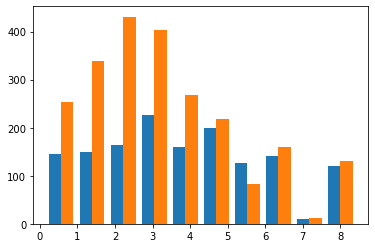

In [31]:
plt.hist([np.sqrt(chain['distance_to_van']),np.sqrt(non_chain['distance_to_van'])])

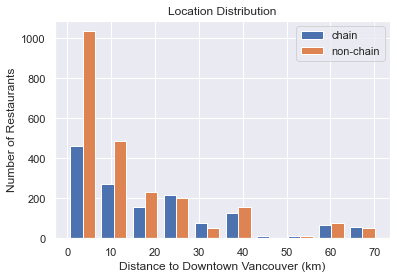

In [41]:
plt.hist([(chain['distance_to_van']),(non_chain['distance_to_van'])], label=['chain','non-chain'])
plt.title('Location Distribution')
plt.xlabel('Distance to Downtown Vancouver (km)')
plt.ylabel('Number of Restaurants')
plt.legend(loc="upper right")

(array([1035.,  486.,  233.,  198.,   50.,  154.,    2.,   12.,   77.,
          53.]),
 array([2.25331731e-02, 7.10074017e+00, 1.41789472e+01, 2.12571542e+01,
        2.83353611e+01, 3.54135681e+01, 4.24917751e+01, 4.95699821e+01,
        5.66481891e+01, 6.37263961e+01, 7.08046031e+01]),
 <a list of 10 Patch objects>)

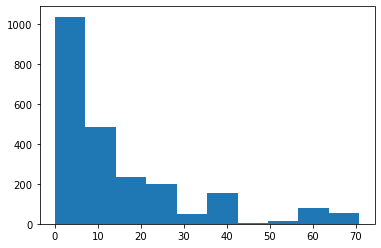

In [33]:
plt.hist((non_chain['distance_to_van']))

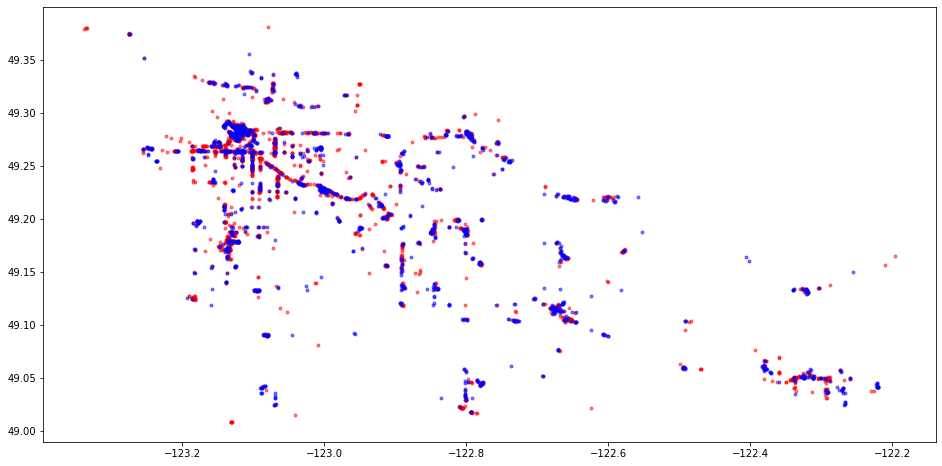

In [34]:
fig = plt.figure(figsize=(16, 8))
plt.plot(non_chain['lon'], non_chain['lat'], 'r.', alpha=0.5)
plt.plot(chain['lon'], chain['lat'], 'b.', alpha=0.5)
plt.show()

In [35]:
stats.mannwhitneyu(chain['distance_to_van'], non_chain['distance_to_van'], alternative="two-sided")

MannwhitneyuResult(statistic=1938738.0, pvalue=3.987428762379338e-18)

In [36]:
# p value is very small, meaning the distances for the two groups are different

In [37]:
# stats.normaltest(np.log(chain['distance_to_van'])).pvalue

In [38]:
chain

,lat,lon,timestamp,amenity,name,tags,is_chain,district,distance_to_van
217,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,True,2,2.467083
218,49.279114,-123.115825,2019-09-03T04:57:07.000-07:00,fast_food,Salad Loop,{},True,2,0.536737
9881,49.193580,-123.180788,2019-09-14T05:00:22.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'level': '0', 'b...",True,4,10.852168
9882,49.228400,-122.848383,2019-11-20T11:48:37.000-08:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe...",True,2,20.654484
9883,49.212449,-122.919749,2019-07-02T01:10:30.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'website': 'http...",True,2,16.540509
...,...,...,...,...,...,...,...,...,...
16981,49.279493,-123.114360,2020-01-20T06:49:53.000-08:00,restaurant,Triple O’s,{},True,2,0.580952
16995,49.177495,-122.866194,2019-09-13T13:57:05.000-07:00,fast_food,Camy's Pizza,"{'cuisine': 'pizza', 'addr:housenumber': '1284...",True,4,21.867655
16996,49.233143,-123.090064,2019-03-19T06:06:11.000-07:00,fast_food,Camy's Pizza,"{'wheelchair': 'yes', 'addr:housenumber': '568...",True,2,5.953745
17289,49.216029,-122.589506,2014-11-07T06:05:27.000-08:00,restaurant,Pappa Leo's,"{'cuisine': 'pizza', 'addr:housenumber': '2280...",True,1,39.249380


In [39]:
# def price_to_f(airbnb):
#     price = airbnb['price']
#     f = locale.atof(price[1:])
#     return f
# airbnb_weight['price'] = airbnb_weight.apply(lambda x: price_to_f(x), axis=1)